## <font color=green> Challenge Alura Store

### <font color=Blue> Primer desafío

### Durante el desafío, Ayudar al Sr. Juan a decidir qué tienda de su cadena Alura Store debe vender para iniciar un nuevo emprendimiento.

### <font Color=Blue> Analizar
### * Datos de venta
### * Rendimiento
### * Reseñas

### Identificar la tienda eficiente y presentar una recomendación final basadas en los datos.

### <font color=blue> Cargar datos



In [32]:
from collections import defaultdict
import csv
from urllib.request import urlopen
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# <Font Color=Green> Requisitos

## <Font Color=Blue> Analizar datos de la tienda:
### Evaluar información como
###   * Ingresos
###   * Categorias más vendidas
###   * Las reseñas de los clientes
###   * Los productos más vendidos
###   * El envío promedio

### <Font Color=Blue> 1.- Análisis de facturación

### from urllib.request import urlopen
### Con esta libreria se obtienen recursos de internet
### En este caso es para abrir un archivo csv desde una URL

In [33]:
# Se crea una lista con la ubicación de los archivos csv
urls = [url, url2, url3, url4]

# Función para leer el archivo csv desde la URL
def read_csv_from_url(url):
    datos = []
    with urlopen(url) as response:
      csv_reader = csv.DictReader(response.read().decode('utf-8').splitlines())
      for fila in csv_reader:
          datos.append(fila)
    return datos

# Análisis de facturación
total_facturacion = 0

for i,url in enumerate(urls):
  datos_tienda = read_csv_from_url(url)
  facturacion_tienda = 0
  for fila in datos_tienda[1:]:
    facturacion_tienda += float(fila['Precio'])

  print(f"La facturación de la tienda {i+1} es: ${facturacion_tienda:.2f}")
  total_facturacion += facturacion_tienda

# Mostrar facturación total
print(f"\nLa facturación total de la cadena es: {total_facturacion}")

La facturación de la tienda 1 es: $1150716100.00
La facturación de la tienda 2 es: $1116059900.00
La facturación de la tienda 3 es: $1096734500.00
La facturación de la tienda 4 es: $1037290900.00

La facturación total de la cadena es: 4400801400.0


In [34]:
# Sumamos los precios de las ventas, sin considerar las cuotas
facturacion_tienda1 = tienda["Precio"].astype(float).sum()
facturacion_tienda2 = tienda2["Precio"].astype(float).sum()
facturacion_tienda3 = tienda3["Precio"].astype(float).sum()
facturacion_tienda4 = tienda4["Precio"].astype(float).sum()

# Mostramos los resultados
print(f"La facturación de la tienda 1 es: ${facturacion_tienda1:.2f}")
print(f"La facturación de la tienda 2 es: ${facturacion_tienda2:.2f}")
print(f"La facturación de la tienda 3 es: ${facturacion_tienda3:.2f}")
print(f"La facturación de la tienda 4 es: ${facturacion_tienda4:.2f}")

# Facturación total de todas las tiendas
total_facturacion = facturacion_tienda1 + facturacion_tienda2 + facturacion_tienda3 + facturacion_tienda4
print(f"\nLa facturación total de la cadena es: ${total_facturacion:.2f}")

La facturación de la tienda 1 es: $1150880400.00
La facturación de la tienda 2 es: $1116343500.00
La facturación de la tienda 3 es: $1098019600.00
La facturación de la tienda 4 es: $1038375700.00

La facturación total de la cadena es: $4403619200.00


## <Font Color=Blue> 2.- Ventas por categoría

In [35]:
# Análisis de ventas

# Función para leer el archivo csv desde la URL
def read_csv_from_url(url):
    datos = []
    with urlopen(url) as response:
      csv_reader = csv.DictReader(response.read().decode('utf-8').splitlines())
      for fila in csv_reader:
          datos.append(fila)
    return datos

# Diccionario para almacenar las ventas por categoría
ventas_por_categoria = {}

# Iterar a través de las URLs y calcular las ventas por categoría
for i,url in enumerate(urls):
    datos_tienda = read_csv_from_url(url)
    print(f"\nVentas por categoría en la tienda {i+1}:")

    # Diccionario  para la tienda actual
    categorias_tienda = {}

    for fila in datos_tienda[1:]:
        categoria = fila['Categoría del Producto']
        precio = float(fila['Precio'])
        cantidad = int(fila['Cantidad de cuotas'])
        monto_venta = precio * cantidad

        # Se agrega al diccionario la tienda actual
        if categoria in categorias_tienda:
            categorias_tienda[categoria] += monto_venta
        else:
            categorias_tienda[categoria] = monto_venta

        # Se agrega al diccionario general
        if categoria in ventas_por_categoria:
            ventas_por_categoria[categoria] += monto_venta
        else:
            ventas_por_categoria[categoria] = monto_venta

    # Mostrar resultados para esta tienda
    for categoria, monto_venta in categorias_tienda.items():
      print(f"   {categoria}: ${monto_venta:.2f}")

# Mostar resultados totales
print("\nVentas totales por categoría:")
for categoria, monto_venta in ventas_por_categoria.items():
    print(f"   {categoria}: ${monto_venta:.2f}")

# Calcular el total general
total_general = sum(ventas_por_categoria.values())
print(f"\nTotal general: ${total_general:.2f}")



Ventas por categoría en la tienda 1:
   Muebles: $582928200.00
   Juguetes: $49062800.00
   Electrodomésticos: $1032375600.00
   Electrónicos: $1289076300.00
   Artículos para el hogar: $38316800.00
   Deportes y diversión: $126883700.00
   Libros: $25769400.00
   Instrumentos musicales: $276990500.00

Ventas por categoría en la tienda 2:
   Instrumentos musicales: $294448700.00
   Muebles: $527048500.00
   Deportes y diversión: $81660600.00
   Electrónicos: $1286643600.00
   Artículos para el hogar: $42739700.00
   Juguetes: $46721200.00
   Electrodomésticos: $1026226300.00
   Libros: $31417000.00

Ventas por categoría en la tienda 3:
   Muebles: $555092500.00
   Instrumentos musicales: $250336000.00
   Deportes y diversión: $123399200.00
   Electrónicos: $1101334500.00
   Juguetes: $61190400.00
   Artículos para el hogar: $44724600.00
   Electrodomésticos: $1076240400.00
   Libros: $26358900.00

Ventas por categoría en la tienda 4:
   Muebles: $556628000.00
   Deportes y diversión: 

In [36]:
# Función para calcular y mostrar las ventas por categoría de una tienda

def calcular_ventas_por_categoria(datos_tienda, nombre_tienda):
    print(f"\nVentas por categoría en la tienda {nombre_tienda}:")
    ventas = datos_tienda.groupby('Categoría del Producto')['Precio'].sum()
    for categoria, monto_venta in ventas.items():
        print(f"   {categoria}: ${monto_venta:.2f}")
        ventas_por_categoria[categoria] = monto_venta
    return ventas_por_categoria

# Mostrar resultados para cada tienda
calcular_ventas_por_categoria(tienda, "1")
calcular_ventas_por_categoria(tienda2, "2")
calcular_ventas_por_categoria(tienda3, "3")
calcular_ventas_por_categoria(tienda4, "4")

# Calcular el total general
total_general = sum(ventas_por_categoria.values())
print(f"\nTotal general: ${total_general:.2f}")


Ventas por categoría en la tienda 1:
   Artículos para el hogar: $12698400.00
   Deportes y diversión: $39290000.00
   Electrodomésticos: $363685200.00
   Electrónicos: $429493500.00
   Instrumentos musicales: $91299000.00
   Juguetes: $17995700.00
   Libros: $8784900.00
   Muebles: $187633700.00

Ventas por categoría en la tienda 2:
   Artículos para el hogar: $14746900.00
   Deportes y diversión: $34744500.00
   Electrodomésticos: $348567800.00
   Electrónicos: $410831100.00
   Instrumentos musicales: $104990300.00
   Juguetes: $15945400.00
   Libros: $10091200.00
   Muebles: $176426300.00

Ventas por categoría en la tienda 3:
   Artículos para el hogar: $15060000.00
   Deportes y diversión: $35593100.00
   Electrodomésticos: $329237900.00
   Electrónicos: $410775800.00
   Instrumentos musicales: $77380900.00
   Juguetes: $19401100.00
   Libros: $9498700.00
   Muebles: $201072100.00

Ventas por categoría en la tienda 4:
   Artículos para el hogar: $15074500.00
   Deportes y diversió

## <Font Color=Blue> 3.- Calificación promedio de la tienda

In [37]:
# Función para leer el archivo csv desde la URL
def read_csv_from_url(url):
    datos = []
    with urlopen(url) as response:
      csv_reader = csv.DictReader(response.read().decode('utf-8').splitlines())
      for fila in csv_reader:
          datos.append(fila)
    return datos

# Calcular la calificación promedio para cada tienda
for i, url in enumerate(urls):
    datos_tienda = read_csv_from_url(url)

    # Variables para calcular el promedio
    suma_calificaciones = 0
    cantidad_productos = 0

    for producto in datos_tienda:
        try:
            # Intentamos con diferentes posibles nombres de columna
            if 'Calificación' in producto:
                calificacion = float(producto['Calificación'])
            else:
                # Si no encontramos la columna, imprimimos las claves disponibles
                print(f"Claves disponibles en la tienda {i+1}:", producto.keys())
                raise KeyError("No se encontró la columna de calificación")

            suma_calificaciones += calificacion
            cantidad_productos += 1
        except (ValueError, KeyError) as e:
            if isinstance(e, KeyError):
                raise
            # Ignoramos valores que no se pueden convertir a float
            continue

    if cantidad_productos > 0:
      promedio_calificacion = suma_calificaciones / cantidad_productos
      print(f"La calificación promedio de la tienda {i+1} es: {promedio_calificacion:.2f}")
    else:
      print(f"No se encontraron calificaciones para la tienda {i+1}")


La calificación promedio de la tienda 1 es: 3.98
La calificación promedio de la tienda 2 es: 4.04
La calificación promedio de la tienda 3 es: 4.05
La calificación promedio de la tienda 4 es: 4.00


## <Font Color=Blue> 4.- Productos más y menos vendidos

In [38]:
# Función para leer el archivo csv desde la URL
def read_csv_from_url(url):
    datos = []
    with urlopen(url) as response:
      csv_reader = csv.DictReader(response.read().decode('utf-8').splitlines())
      for fila in csv_reader:
          datos.append(fila)
    return datos

# Función para calcular Top 3 más y menos dinero generado
def top_3_dinero_generado(datos_tienda, nombre_tienda, top_n=3):
    # Se declara la variable de tipo float
    ingresos_por_producto = defaultdict(float)

    for fila in datos_tienda:
        producto = fila['Producto']
        precio = float(fila['Precio'])
        # Solo se agrega el precio
        ingresos_por_producto[producto] += precio

    # Se ordena la lista para obtener el Top 3 más y menos
    productos_ordenados = sorted(ingresos_por_producto.items(), key=lambda x: x[1], reverse=True)
    # Los tres productos más vendidos
    top_productos_mas = productos_ordenados[:top_n]
    # Los tres productos menos vendidos
    top_productos_menos = productos_ordenados[-top_n:]

    print(f"\nTop {top_n} productos más vendidos en la tienda {nombre_tienda}:")
    for producto, monto_venta in top_productos_mas:
        print(f"   {producto}: ${monto_venta:.2f}")
        # Se ordena la lista para obtener el Top 3 más y menos
    print(f"\nTop {top_n} productos menos vendidos en la tienda {nombre_tienda}:")
    for producto, monto_venta in top_productos_menos:
        print(f"   {producto}: ${monto_venta:.2f}")

# Recorre todas las tiendas he identica el Top 3 productos más y menos dinero generado
print(f"\nTop 3 productos más y menos dinero generado")
for i, url in enumerate(urls):
    datos_tienda = read_csv_from_url(url)
    top_3_dinero_generado(datos_tienda, i+1)



Top 3 productos más y menos dinero generado

Top 3 productos más vendidos en la tienda 1:
   TV LED UHD 4K: $142150200.00
   Refrigerador: $112143300.00
   Iphone 15: $97902200.00

Top 3 productos menos vendidos en la tienda 1:
   Cubo mágico 8x8: $696900.00
   Dinosaurio Rex: $688900.00
   Cuerda para saltar: $652800.00

Top 3 productos más vendidos en la tienda 2:
   Iphone 15: $113225800.00
   TV LED UHD 4K: $103375000.00
   Refrigerador: $97632500.00

Top 3 productos menos vendidos en la tienda 2:
   Cuerda para saltar: $856900.00
   Dinosaurio Rex: $770300.00
   Cubo mágico 8x8: $643600.00

Top 3 productos más vendidos en la tienda 3:
   Refrigerador: $99889700.00
   TV LED UHD 4K: $96669100.00
   Iphone 15: $93225700.00

Top 3 productos menos vendidos en la tienda 3:
   Cuerda para saltar: $853800.00
   Dinosaurio Rex: $795600.00
   Cubo mágico 8x8: $640400.00

Top 3 productos más vendidos en la tienda 4:
   Iphone 15: $96697500.00
   TV LED UHD 4K: $90295300.00
   Smart TV: $82

In [39]:
# Lee los archivos CSV y se agrega una columna 'Tienda'
df_total = pd.concat(
    [pd.read_csv(url).assign(Tienda=f"Tienda {i+1}") for i, url in enumerate(urls)],
    ignore_index=True
    )

# Se asegura que el tipo de dato sea el correcto
df_total['Precio'] = df_total["Precio"].astype(float)
df_total['Cantidad de cuotas'] = df_total["Cantidad de cuotas"].astype(int)

# El ingreso es simplemente el Precio no se multiplica por cantidad
df_total['Ingreso'] = df_total['Precio']

# Agrupamos por tienda y producto sumando el ingreso
df_top_productos = df_total.groupby(['Tienda', 'Producto'])['Ingreso'].sum().reset_index()

# Función para mostrar los 3 productos que más y menos dinero generaron
def mostrar_top_productos(df, top_n=3):
    # Top 3 productos más vendidos
    top_productos_mas = df.nlargest(top_n, 'Ingreso')
    # Top 3 productos menos vendidos
    top_productos_menos = df.nsmallest(top_n, 'Ingreso')
    print(f"\nTop {top_n} productos más vendidos:")
    print(top_productos_mas.to_string(index=False))
    print(f"\nTop {top_n} productos menos vendidos:")
    print(top_productos_menos.to_string(index=False))

# Mostrar los 3 productos que más y menos dinero generaron
mostrar_top_productos(df_top_productos)

# Mostrar resultados para cada tienda
for tienda, df_tienda in df_total.groupby('Tienda'):
    print(f"\nTop 3 productos más y menos vendidos en la tienda {tienda}:")
    mostrar_top_productos(df_tienda)


Top 3 productos más vendidos:
  Tienda      Producto     Ingreso
Tienda 1 TV LED UHD 4K 142150200.0
Tienda 2     Iphone 15 113225800.0
Tienda 1  Refrigerador 112143300.0

Top 3 productos menos vendidos:
  Tienda           Producto  Ingreso
Tienda 3    Cubo mágico 8x8 640400.0
Tienda 2    Cubo mágico 8x8 643600.0
Tienda 1 Cuerda para saltar 652800.0

Top 3 productos más y menos vendidos en la tienda Tienda 1:

Top 3 productos más vendidos:
     Producto Categoría del Producto    Precio  Costo de envío Fecha de Compra       Vendedor Lugar de Compra  Calificación     Método de pago  Cantidad de cuotas     lat       lon   Tienda   Ingreso
TV LED UHD 4K           Electrónicos 2977000.0        158700.0      23/08/2020 Santiago Silva          Bogotá             5              Nequi                   1 4.60971 -74.08175 Tienda 1 2977000.0
TV LED UHD 4K           Electrónicos 2975000.0        160800.0      28/12/2022 Juan Fernandez            Cali             5 Tarjeta de crédito              

## <Font Color=Blue> 5.- Envío promedio por tienda

In [40]:
def calcular_envio_promedio(datos_tienda, nombre_tienda):
    envios_por_tienda = defaultdict(list)
    for fila in datos_tienda:
        envio = float(fila['Costo de envío'])
        envios_por_tienda[nombre_tienda].append(envio)
        # Calcular el envío promedio
    envio_promedio = sum(envios_por_tienda[nombre_tienda]) / len(envios_por_tienda[nombre_tienda]) if envios_por_tienda[nombre_tienda] else 0
    print(f"El envío promedio de la tienda {nombre_tienda} es: ${envio_promedio:.2f}")
    return envio_promedio

# Calcular el envío promedio para cada tienda
for i, url in enumerate(urls):
    datos_tienda = read_csv_from_url(url)
    calcular_envio_promedio(datos_tienda, i+1)


El envío promedio de la tienda 1 es: $26018.61
El envío promedio de la tienda 2 es: $25216.24
El envío promedio de la tienda 3 es: $24805.68
El envío promedio de la tienda 4 es: $23459.46


In [20]:
# Asegurar que el costo de envío es numérico
df_total['Costo de envío'] = pd.to_numeric(df_total['Costo de envío'], errors='coerce')

# Calcular el envío promedio por tienda
envio_promedio_por_tienda = df_total.groupby('Tienda')['Costo de envío'].mean()

# Mostrar resultados
print("El envío promedio por tienda es:")
# print(envio_promedio_por_tienda)
for tienda, envio_promedio in envio_promedio_por_tienda.items():
    print(f"La {tienda} tiene un envío promedio de ${envio_promedio:.2f}")

El envío promedio por tienda es:
La Tienda 1 tiene un envío promedio de $26018.61
La Tienda 2 tiene un envío promedio de $25216.24
La Tienda 3 tiene un envío promedio de $24805.68
La Tienda 4 tiene un envío promedio de $23459.46


## <Font Color=Blue> 6.- Crear gráficos para visualización:

### Decidir que tipos de gráficos utilizar para presentar los resultados de forma clara y visual.
### Mínimo 3 gráficos diferentes, que pueden incluir gráficos de
### * Barras
### * Circulares
### * De dispersión
### * Otros

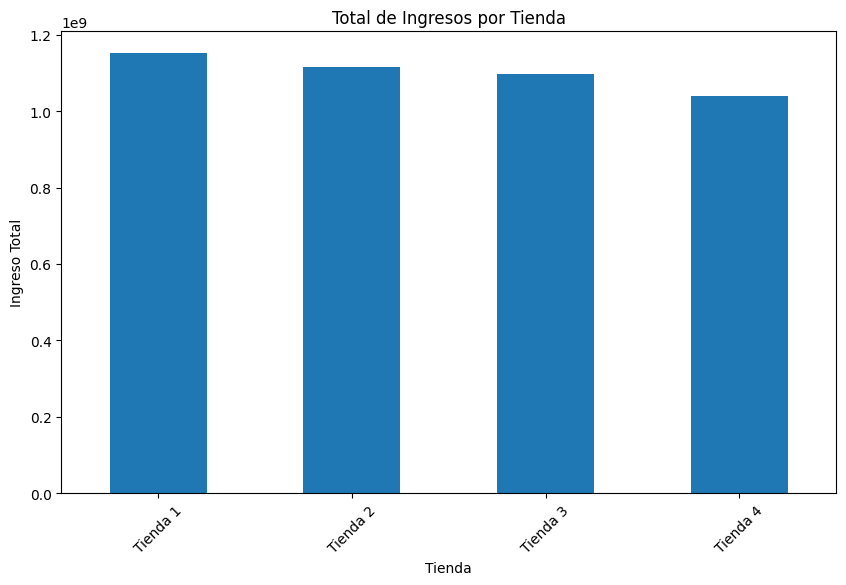

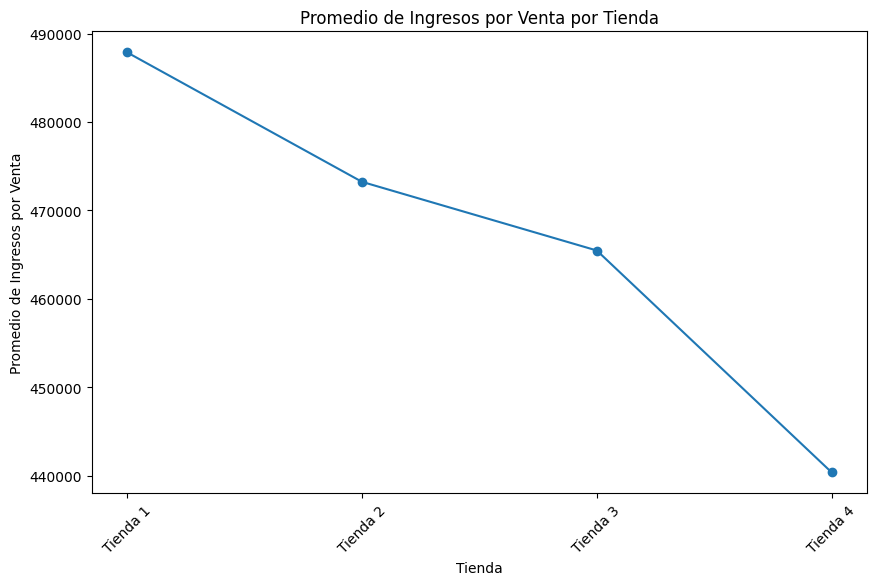

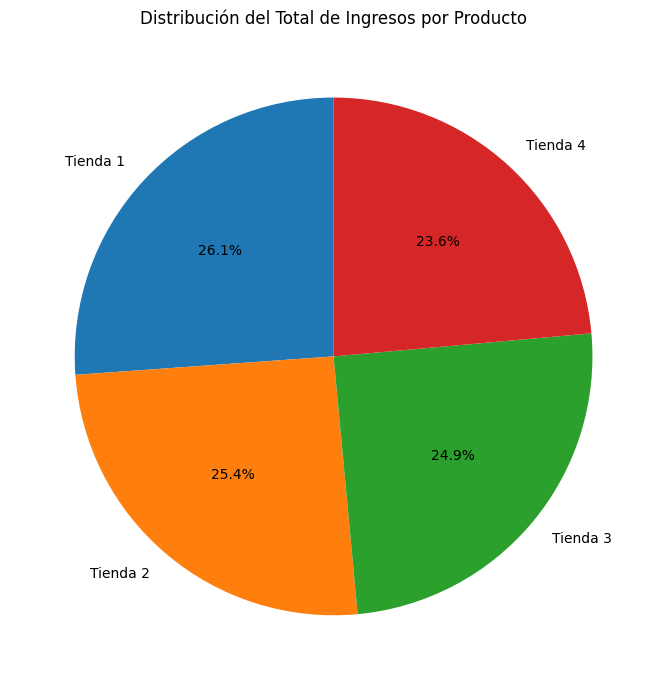

In [43]:
import matplotlib.pyplot as plt

df_total['Precio'] = df_total['Precio'].astype(float)

# Asegurar que sea el tipo de dato correcto
df_total['Precio'] = pd.to_numeric(df_total['Precio'], errors='coerce')

# El ingreso de cada venta es solo el precio
df_total['Ingreso'] = df_total['Precio']

# Agrupamos por tienda y producto sumando el ingreso
ingresos_totales = df_total.groupby('Tienda')['Ingreso'].sum()
ingreso_promedio = df_total.groupby('Tienda')['Ingreso'].mean()
distribucion_ingresos = ingresos_totales

#df_total['Cantidad de cuotas'] = df_total['Cantidad de cuotas'].astype(int)

# Se agregan 3 tipos de gráficas

# 1. Barra vertical: Total de ingresos
plt.figure(figsize=(10, 6))
#plt.bar(ingresos_totales['Tienda'], ingresos_totales['Ingreso'])
colores = ['#FF0000','#32CD32','#00BFFF','#FFFF00']  #VER TABLA COLORES https://htmlcolorcodes.com/es/nombres-de-los-colores/
ingresos_totales.plot(kind='bar')
plt.xlabel('Tienda')
plt.ylabel('Ingreso Total')
plt.title('Total de Ingresos por Tienda')
plt.xticks(rotation=45)
plt.show()

# 2. Línea: Promedio de ingresos por venta
plt.figure(figsize=(10, 6))
plt.plot(ingreso_promedio.index, ingreso_promedio.values, marker='o')
plt.xlabel('Tienda')
plt.ylabel('Promedio de Ingresos por Venta')
plt.title('Promedio de Ingresos por Venta por Tienda')
plt.xticks(rotation=45)
plt.show()

# 3. Torta/Pie: Distribución del total
plt.figure(figsize=(7, 7))
#plt.pie(distribucion_ingresos['Ingreso'], labels=distribucion_ingresos['Producto'], autopct='%1.1f%%')
#distribucion_ingresos.plot(kind='pie', y='Ingreso', labels=distribucion_ingresos['Producto'], autopct='%1.1f%%')
distribucion_ingresos.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribución del Total de Ingresos por Producto')
plt.ylabel('')
plt.tight_layout()
plt.show()


## <Font Color=Blue> Envíar una recomendación:
### Después del análisis, escribir un texto explicando a qué tienda debería vender el Sr. Juan y por qué, basándose en los datos presentados.

### Despúes de realizar el análisis de las 4 tiendas
### Puedo aconsejar que la tienda que debe vender el Sr. Juan es la tienda 4, ya que es la que:
### * Tiene las ventas más bajas
### * Menores ingresos
### * Se encuentra en el lugar 3 en calificación
### * Apesar de tener el menor costo de envío
### * Requiere una mejor estrategía en productos electrodométicos para incrementar sus ventas
